# Project Description

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load a data file named laptops.csv.
df = pd.read_csv("laptops.csv")

In [42]:
# Get more information about the data set. also check whether there are null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [43]:
df.isnull().sum()

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

In [44]:
#Get a quick overview of the DataFrame (First 5 rows)
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


## Question 1. What is the most expensive laptop in the dataset?

In [5]:
# Sort the DataFrame by the 'Final Price' column in descending order
sorted_df = df.sort_values(by='Final Price', ascending=False)

# Get the most expensive laptop (first row after sorting)
most_expensive_laptop = sorted_df.iloc[0]

print("The most expensive laptop is:")
print(most_expensive_laptop)

The most expensive laptop is:
Laptop          MSI Raider GE78HX 13VH-065ES Intel Core i9-139...
Status                                                        New
Brand                                                         MSI
Model                                                      Raider
CPU                                                 Intel Core i9
RAM                                                            32
Storage                                                      2000
Storage type                                                  SSD
GPU                                                      RTX 4080
Screen                                                       17.0
Touch                                                          No
Final Price                                               7150.47
Name: 1099, dtype: object


**Observation**:
- The most expensive laptop is MSI Raider GE78HX 13VH-065ES Intel Core i9-139

In [9]:
# Question 2. Which brand offers the largest variety of models in the dataset?

# We use groupby to group the data by the "Brand" column, and then count the number of models for each brand
brand_counts = df.groupby('Brand')['Model'].nunique()

# To find the brand with the highest count (the brand with the largest variety of models)
largest_variety_brand = brand_counts.idxmax()
num_models = brand_counts.reset_index()["Model"].max()

print("Brand with the largest variety of models:", largest_variety_brand)
print(f"Number of models in {largest_variety_brand} are {num_models}")

Brand with the largest variety of models: Asus
Number of models in Asus are 20


In [11]:
# Question 3. How many laptops in the dataset have an Intel Core i7 processor?

# Filter laptops with Intel Core i7 processor
intel_core_i7_laptops = df[df["CPU"].str.contains("Intel Core i7", case=False)]

# Get the count of laptops with Intel Core i7 processor and print
total_intel_core_i7_laptops = intel_core_i7_laptops.shape[0]
print("Number of laptops with Intel Core i7 processor:", total_intel_core_i7_laptops)


Number of laptops with Intel Core i7 processor: 710


In [12]:
len(intel_core_i7_laptops)

710

In [13]:
# Question 4. Which laptop has the highest amount of RAM?

# Sort the DataFrame by the "RAM" column in descending order
df_sorted_by_ram = df.sort_values(by="RAM", ascending=False)

# Select the first row, which will have the highest RAM value
laptop_with_highest_ram = df_sorted_by_ram.iloc[0]

# Print the laptop with the highest amount of RAM
print("Laptop with the highest amount of RAM:")
laptop_with_highest_ram

Laptop with the highest amount of RAM:


Laptop          MSI Titan GT77 HX 13VI-006ES Intel Core i9-139...
Status                                                        New
Brand                                                         MSI
Model                                                       Titan
CPU                                                 Intel Core i9
RAM                                                           128
Storage                                                      2000
Storage type                                                  SSD
GPU                                                      RTX 4090
Screen                                                       17.3
Touch                                                          No
Final Price                                                5999.0
Name: 478, dtype: object

In [20]:
# Question 5. What is the average storage capacity (in GB) of the laptops in the dataset?

# Calculate the average storage capacity in GB, we use mean() function
average_storage_gb = df["Storage"].mean()
max_storage_gb = df["Storage"].max()
min_storage_gb = df["Storage"].min()

# Print the result as float with 2 decimal places
print(f"The average storage capacity of the laptops in the dataset is {average_storage_gb:.2f} GB.")
print(f"The maximum storage capacity of the laptops in the dataset is {max_storage_gb:.2f} GB.")
print(f"The minimum storage capacity of the laptops in the dataset is {min_storage_gb:.2f} GB.")

min_storage_df = df[df["Storage"]== min_storage_gb]
min_storage_df.head()

The average storage capacity of the laptops in the dataset is 596.29 GB.
The maximum storage capacity of the laptops in the dataset is 4000.00 GB.
The minimum storage capacity of the laptops in the dataset is 0.00 GB.


,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
189,Portátil Alurin Flex Advance Intel Core I5-115...,Refurbished,Alurin,Flex Advance,Intel Core i5,8,0,NaN,NaN,14.0,No,368.7


In [22]:
# Question 6. How many laptops in the dataset have a touchscreen feature?

num_touchscreen_laptops = df['Touch'].value_counts().get('Yes', 0)
print("Number of laptops with touchscreen feature:", num_touchscreen_laptops)

Number of laptops with touchscreen feature: 227


In [26]:
#Question 7. Which brand offers the most affordable laptop in terms of price?

affordable_laptops_df = df.groupby("Brand").agg(
                        mean_price = ("Final Price",np.mean),
                        median_price = ("Final Price",np.median)
                        ).reset_index()
affordable_laptops_df.sort_values("mean_price", ascending = True)

,Brand,mean_price,median_price
20,Prixton,292.280000,299.940
24,Thomson,316.860000,314.915
6,Denver,329.950000,329.950
19,Primux,339.618750,311.115
10,Innjoo,347.888333,350.315
11,Jetwing,469.270000,469.270
1,Alurin,484.701379,499.000
25,Toshiba,799.000000,799.000
15,Medion,905.331875,546.310
9,HP,952.628478,727.950


In [20]:
#Question 8. What is the distribution of screen sizes among the laptops?

#Get the distribution
distribution = df['Screen'].value_counts()

# Print the distribution
print(distribution)

Screen
15.60    1009
14.00     392
16.00     174
17.30     161
13.30     131
16.10      48
17.00      33
13.00      27
15.00      21
13.40      19
13.50      19
11.60      16
14.20      14
12.30      13
14.10      11
13.60      11
16.20      10
15.30       8
10.50       7
12.40       6
14.40       6
15.40       5
12.00       4
18.00       3
14.50       3
13.90       2
12.50       1
10.95       1
10.10       1
Name: count, dtype: int64


In [39]:
#Question 9. Which laptop has the best price-to-performance ratio, considering both the CPU and GPU?
price_performance_df = df[df["CPU"]=="Intel Core i9"]
price_performance_df = price_performance_df[(price_performance_df["GPU"].isnull()== False) & (price_performance_df["Status"] == "New")]
min_price = price_performance_df["Final Price"].min()
price_performance_df = price_performance_df[price_performance_df["Final Price"] == min_price]
price_performance_df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
998,Acer Nitro 5 AN517-54-9875 Intel Core i9-11900...,New,Acer,Nitro,Intel Core i9,16,512,SSD,RTX 3060,17.3,No,1495.69


In [38]:
price_performance_df = df[df["CPU"]=="Intel Core i7"]
price_performance_df = price_performance_df[(price_performance_df["GPU"].isnull()== False) & (price_performance_df["Status"] == "New")]
min_price = price_performance_df["Final Price"].min()
price_performance_df = price_performance_df[price_performance_df["Final Price"] == min_price]
price_performance_df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
711,ASUS TUF Gaming F15 TUF507ZC4-HN040 Intel Core...,New,Asus,TUF,Intel Core i7,16,512,SSD,RTX 3050,15.6,No,909.99


In [6]:
#Question 10. What is the average price of laptops with an Intel Core i5 processor?

# Filter the DataFrame to include only rows with Intel Core i5 processor and ensure that case  is insensitive.
i5_laptops = df[df['CPU'].str.contains('Intel Core i5', case=False, na=False)]

# Calculate the average price of laptops with Intel Core i5 processor
average_price_i5 = i5_laptops['Final Price'].mean()

print(f"The average price of laptops with Intel Core i5 processor is ${average_price_i5:.2f}")


The average price of laptops with Intel Core i5 processor is $888.38


In [18]:
#Question 11. How many laptops have a screen size of 15.6 inches?

#Remember that data is float
screen_size = df['Screen'].value_counts().get(15.6, 0)
print(f"The number of laptops with a screen size of 15.6 inches is {screen_size}.")

The number of laptops with a screen size of 15.6 inches is 1009.


In [40]:
#Question 12. Among the laptops with touchscreens, which brand has the highest average price?

#Filter laptops with touchscreens
touchscreen_laptops = df[df['Touch'] == 'Yes']

#Group by brand and calculate the average price
average_price_by_brand = touchscreen_laptops.groupby('Brand')['Final Price'].mean()

#Find the brand with the highest average price
highest_average_price_brand = average_price_by_brand.idxmax()
highest_average_price = average_price_by_brand.max()

print(f"The brand with the highest average price among laptops with touchscreens is {highest_average_price_brand}.")
print(f"The average price for laptops from this brand is ${highest_average_price:,.2f}.")


The brand with the highest average price among laptops with touchscreens is MSI.
The average price for laptops from this brand is $2,697.43.


In [11]:
#Question 13 What is the price range for laptops with an NVIDIA RTX 3050 graphics card?

#check the unique values
unique_gpu_values = df['GPU'].unique()
print(unique_gpu_values)

#price range for laptops with an NVIDIA RTX 3050 graphics card
rtx_3050_laptops = df[df['GPU'] == 'RTX 3050']
price_range_rtx_3050 = (rtx_3050_laptops['Final Price'].min(), rtx_3050_laptops['Final Price'].max())

print(f"The price range for laptops with an NVIDIA RTX 3050 graphics card is ${price_range_rtx_3050[0]} to ${price_range_rtx_3050[1]}.")


[nan 'RTX 3050' 'RTX 4060' 'RTX 4050' 'RTX 3060' 'RTX 4070' 'RTX 2050'
 'GTX 1650' 'RTX 3070' '610 M' 'RTX 4080' 'RX 6500M' 'MX 550' 'RTX 3080'
 'RTX 4090' 'RX 7600S' 'A 370M' 'GTX 1660' 'RTX A1000' 'RTX 3000' 'T 1200'
 'Radeon Pro 5300M' 'A 730M' 'Radeon Pro RX 560X' 'RTX A5500'
 'Radeon Pro 5500M' 'T 500' 'T 550' 'RTX A3000' 'T 2000' 'T 600' 'T 1000'
 'Radeon RX 6600M' 'MX 330' 'RTX A2000' 'MX 450' 'RTX 2070' 'RX 6800S'
 'RTX 2080' 'RTX 2060' 'GTX 1050' 'MX 130' 'P 500' 'RX 6700M' 'GTX 1070']
The price range for laptops with an NVIDIA RTX 3050 graphics card is $666.69 to $3999.0.


In [12]:
#Question 14. What is the average RAM capacity for laptops in the dataset?

average_ram_capacity = df['RAM'].mean()
print(f"The average RAM capacity for laptops in the dataset is {average_ram_capacity:.2f} GB.")


The average RAM capacity for laptops in the dataset is 15.41 GB.


In [41]:
#Question 15. Among the laptops with an AMD Ryzen processor, which model has the highest RAM capacity?

ryzen_laptops = df[df['CPU'].str.contains('AMD Ryzen', case=False, na=False)]
max_ram_model = ryzen_laptops.loc[ryzen_laptops['RAM'].idxmax()]['Model']

print(f"The model with the highest RAM capacity among laptops with an AMD Ryzen processor is {max_ram_model}.")

The model with the highest RAM capacity among laptops with an AMD Ryzen processor is ROG.


# PHASE II

# 1. Is there a correlation between CPU type and the final price of the laptop?

**Could not create a correlation between a string and a numeral**:



# 2. Among laptops with the same CPU, how does the price vary based on RAM and storage configurations?

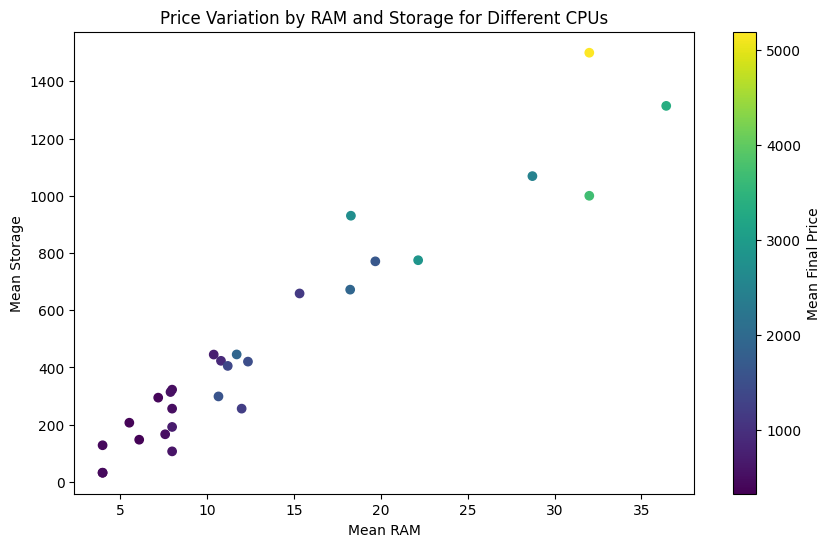

In [11]:
grouped = df.groupby('CPU').agg({
    'Final Price': 'mean',
    'RAM': 'mean',
    'Storage': 'mean'
}).reset_index()

# Visualize the relationship using scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(grouped['RAM'], grouped['Storage'], c=grouped['Final Price'], cmap='viridis')
plt.colorbar(label='Mean Final Price')
plt.xlabel('Mean RAM')
plt.ylabel('Mean Storage')
plt.title('Price Variation by RAM and Storage for Different CPUs')
plt.show()
